# Handwritten digits classification using neural network

# Introduction

The data files contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel. This pixel-value is an integer between 0 and 255, inclusive.

# Problem-Statement
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

## ANN - NN

## Loss/Cost functions

The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.

 1. binary_crossentropy function
 2. categorical_crossentropy function
 3. sparse_categorical_crossentropy function
 4. mean_squared_error function
 5. mean_absolute_error function
 6. mean_absolute_percentage_error function
 7. mean_squared_logarithmic_error function

## Optimizers

1. SGD
2. RMSprop
3. Adam


# Sigmoid function - Derivative

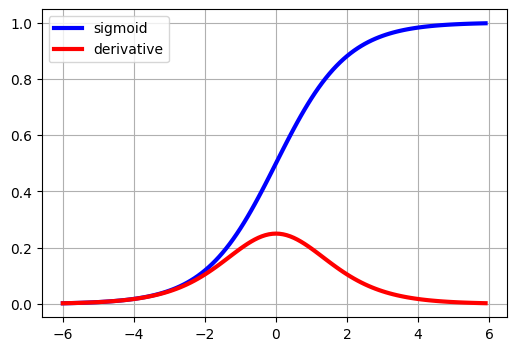

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)  
    return s,ds
x=np.arange(-6,6,0.1)
#print(x)
#print(len(x))
#sigmoid(x)
# Create and show plot
fig, ax = plt.subplots(figsize=(6, 4))
plt.grid()
ax.plot(x,sigmoid(x)[0], color="blue", linewidth=3, label="sigmoid")
ax.plot(x,sigmoid(x)[1], color="red", linewidth=3, label="derivative")
ax.legend(loc="upper left")
fig.show()

## Observations
1. Derivate values are in between 0 and 0.3
2. Derivate values become non zero , if sigmoid values are in range -4 to 4 , otherwise it is zero

# tanh or Hyperbolic function - Derivative

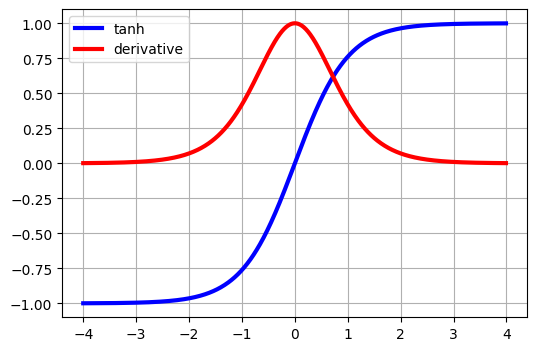

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt

z=np.arange(-4,4,0.01)
# Create and show plot
fig, ax = plt.subplots(figsize=(6, 4))
plt.grid()
ax.plot(z,tanh(z)[0], color="blue", linewidth=3, label="tanh")
ax.plot(z,tanh(z)[1], color="red", linewidth=3, label="derivative")
ax.legend(loc="upper left")
fig.show()

## Observations
1. Derivate values are in between 0 and 1
2. Derivate values become non zero , if tanh values are in range -3 to 3 , otherwise it is zero

# Vanishing gradient
As more layers using certain activation functions are added to neural networks, the gradients of the loss function approaches zero, making the network hard to train.

# 1.Import Python modules

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

2025-09-26 10:26:56.127870: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758882416.312851      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758882416.366558      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2. Load Dataset - MNIST

In [4]:
(X_train, Y_train) , (X_test, Y_test) = keras.datasets.mnist.load_data()
print("train data length:",len(X_train))
print("test data length:",len(X_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
train data length: 60000
test data length: 10000


# 3. Scaling

In [5]:
from tensorflow.keras.utils import to_categorical
Y_train_saved = Y_train
Y_test_saved = Y_test
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)
print(Y_train.shape)
print(Y_test.shape)
# Normalize the features
X_train = X_train / 255
X_test = X_test / 255

# reashaping the 784 pixels into 28 x 28 matrix which represents the pixels of the actual image
# as input we will have an array of these matrices
X_train_scaled = X_train.reshape(X_train.shape[0],28*28)
X_test_scaled = X_test.reshape(X_test.shape[0],28*28)

(60000, 10)
(10000, 10)


# 4. Model

## 4.1 Very simple neural network with no hidden layers- Adam,softmax

In [6]:
model_1 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='softmax')
])

model_1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy']
              )
model_1.summary()
#param_number = output_channel_number * (input_channel_number + 1)
history=model_1.fit(X_train_scaled, Y_train,validation_data=(X_test_scaled, Y_test), epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758882432.341606      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1758882434.900700      57 service.cc:148] XLA service 0x792c60004eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758882434.901222      57 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1758882435.040507      57 cuda_dnn.cc:529] Loaded cuDNN version 90300


  71/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3910 - loss: 1.9233

I0000 00:00:1758882435.460343      57 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8156 - loss: 0.7150 - val_accuracy: 0.9148 - val_loss: 0.3122
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9142 - loss: 0.3080 - val_accuracy: 0.9221 - val_loss: 0.2785
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9222 - loss: 0.2795 - val_accuracy: 0.9225 - val_loss: 0.2733
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9240 - loss: 0.2742 - val_accuracy: 0.9252 - val_loss: 0.2698
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9265 - loss: 0.2630 - val_accuracy: 0.9257 - val_loss: 0.2639
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9278 - loss: 0.2561 - val_accuracy: 0.9259 - val_loss: 0.2649
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9292 - loss: 0.2584 - val_accuracy: 0.9274 - val_loss: 0.2633
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9293 - loss: 0.2564 - val_accurac

In [7]:
model_1.evaluate(X_test_scaled, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9180 - loss: 0.2981


[0.26557457447052, 0.9287999868392944]

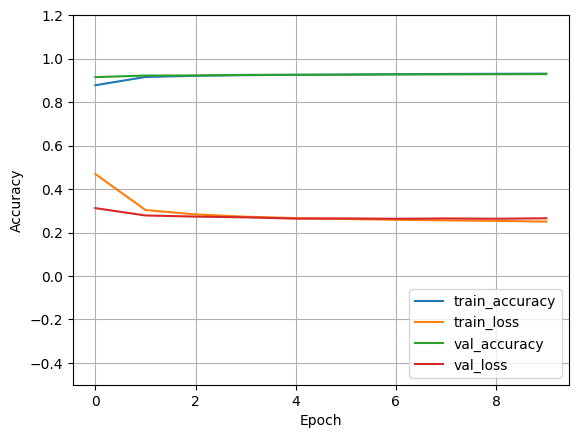

In [8]:
plt.grid()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5, 1.2])
plt.legend(loc='lower right')
plt.show()

## 4.2 Using hidden layer - Adam,softmax

In [9]:
model_2 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_2.summary()
#param_number = output_channel_number * (input_channel_number + 1)

history=model_2.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test),epochs=10)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,390 (333.55 KB)

 Trainable params: 85,390 (333.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8551 - loss: 0.4879 - val_accuracy: 0.9585 - val_loss: 0.1410
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9637 - loss: 0.1193 - val_accuracy: 0.9673 - val_loss: 0.1046
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9728 - loss: 0.0847 - val_accuracy: 0.9735 - val_loss: 0.0845
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9804 - loss: 0.0648 - val_accuracy: 0.9712 - val_loss: 0.0992
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9846 - loss: 0.0479 - val_accuracy: 0.9739 - val_loss: 0.0852
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9877 - loss: 0.0383 - val_accuracy: 0.9706 - val_loss: 0.1059
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9882 - loss: 0.0349 - val_accuracy: 0.9769 - val_loss: 0.0912
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9912 - loss: 0.0263 - 

In [10]:
model_2.evaluate(X_test_scaled, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9693 - loss: 0.1229


[0.10473961383104324, 0.974399983882904]

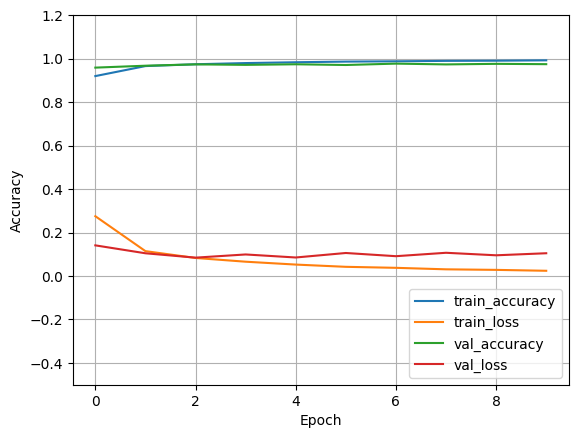

In [11]:
plt.grid()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5, 1.2])
plt.legend(loc='lower right')
plt.show()

## 4.3 Using hidden layer - Adam,Sigmoid 

In [12]:
model_3 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_3.summary()
#param_number = output_channel_number * (input_channel_number + 1)

history=model_3.fit(X_train_scaled, Y_train_saved, validation_data=(X_test_scaled, Y_test_saved),epochs=10)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,390 (333.55 KB)

 Trainable params: 85,390 (333.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8588 - loss: 0.4681 - val_accuracy: 0.9565 - val_loss: 0.1403
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9633 - loss: 0.1221 - val_accuracy: 0.9668 - val_loss: 0.1112
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9736 - loss: 0.0858 - val_accuracy: 0.9738 - val_loss: 0.0867
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9811 - loss: 0.0619 - val_accuracy: 0.9745 - val_loss: 0.0828
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9844 - loss: 0.0481 - val_accuracy: 0.9734 - val_loss: 0.0867
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9873 - loss: 0.0405 - val_accuracy: 0.9746 - val_loss: 0.0911
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9905 - loss: 0.0316 - val_accuracy: 0.9750 - val_loss: 0.0920
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9906 - loss: 0.0287 - 

In [13]:
model_3.evaluate(X_test_scaled, Y_test_saved)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9707 - loss: 0.1137


[0.09669718891382217, 0.9760000109672546]

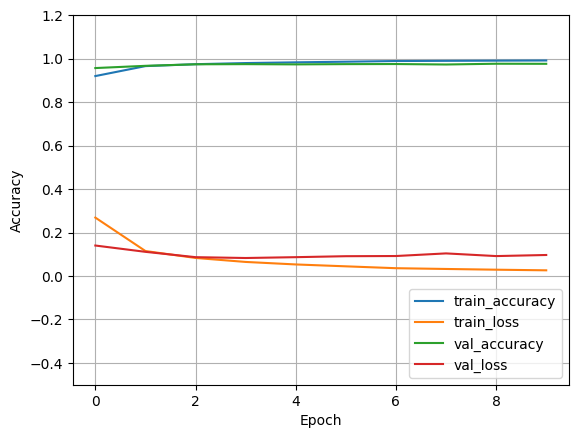

In [14]:
plt.grid()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5, 1.2])
plt.legend(loc='lower right')
plt.show()

## 4.4 Using hidden layer - SGD,Softmax 

In [15]:
model_4 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_4.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_4.summary()
#param_number = output_channel_number * (input_channel_number + 1)

history=model_4.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test),epochs=10)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,390 (333.55 KB)

 Trainable params: 85,390 (333.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6231 - loss: 1.2322 - val_accuracy: 0.9037 - val_loss: 0.3326
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9116 - loss: 0.3063 - val_accuracy: 0.9305 - val_loss: 0.2431
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9315 - loss: 0.2349 - val_accuracy: 0.9386 - val_loss: 0.2064
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9415 - loss: 0.1983 - val_accuracy: 0.9482 - val_loss: 0.1737
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9514 - loss: 0.1682 - val_accuracy: 0.9506 - val_loss: 0.1575
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9566 - loss: 0.1477 - val_accuracy: 0.9571 - val_loss: 0.1410
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9609 - loss: 0.1345 - val_accuracy: 0.9622 - val_loss: 0.1273
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9659 - loss: 0.1169 - 

In [16]:
model_4.evaluate(X_test_scaled, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9607 - loss: 0.1296


[0.10851700603961945, 0.9674000144004822]

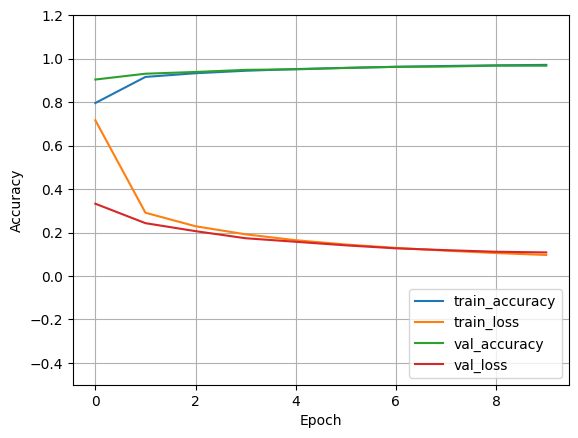

In [17]:
plt.grid()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5, 1.2])
plt.legend(loc='lower right')
plt.show()

## 4.5 Using hidden layer - SGD,Sigmoid 

In [18]:
model_5 = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_5.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_5.summary()
#param_number = output_channel_number * (input_channel_number + 1)

history=model_5.fit(X_train_scaled, Y_train_saved, validation_data=(X_test_scaled, Y_test_saved),epochs=10)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,390 (333.55 KB)

 Trainable params: 85,390 (333.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6111 - loss: 1.3194 - val_accuracy: 0.9063 - val_loss: 0.3172
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9128 - loss: 0.2997 - val_accuracy: 0.9295 - val_loss: 0.2323
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9340 - loss: 0.2245 - val_accuracy: 0.9448 - val_loss: 0.1895
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9456 - loss: 0.1859 - val_accuracy: 0.9524 - val_loss: 0.1632
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9544 - loss: 0.1584 - val_accuracy: 0.9560 - val_loss: 0.1454
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9604 - loss: 0.1390 - val_accuracy: 0.9571 - val_loss: 0.1384
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9639 - loss: 0.1264 - val_accuracy: 0.9619 - val_loss: 0.1259
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9681 - loss: 0.1108 - 

In [19]:
model_5.evaluate(X_test_scaled, Y_test_saved)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9614 - loss: 0.1232


[0.10618580132722855, 0.9678000211715698]

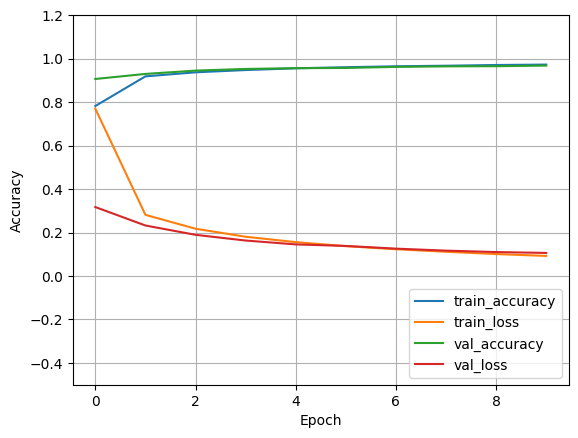

In [20]:
plt.grid()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5, 1.2])
plt.legend(loc='lower right')
plt.show()

# 5.Performance Matrix

In [21]:
y_predicted = model_2.predict(X_test_scaled)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test_saved,predictions=y_predicted_labels)
cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 951,    1,    9,    0,    1,    3,    6,    1,    4,    4],
       [   0, 1128,    6,    0,    0,    0,    1,    0,    0,    0],
       [   0,    0, 1023,    0,    1,    0,    0,    4,    3,    1],
       [   1,    1,   17,  962,    1,    5,    0,    4,   13,    6],
       [   0,    1,    5,    1,  950,    1,    5,    7,    1,   11],
       [   1,    0,    0,    6,    2,  869,    7,    0,    5,    2],
       [   2,    3,    4,    0,    3,    3,  942,    0,    1,    0],
       [   0,    1,   16,    1,    2,    0,    0, 1004,    2,    2],
       [   2,    2,   11,    0,    0,    9,    1,    5,  943,    1],
       [   0,    6,    1,    2,   10,    4,    1,    8,    5,  972]],
      dtype=int32)>

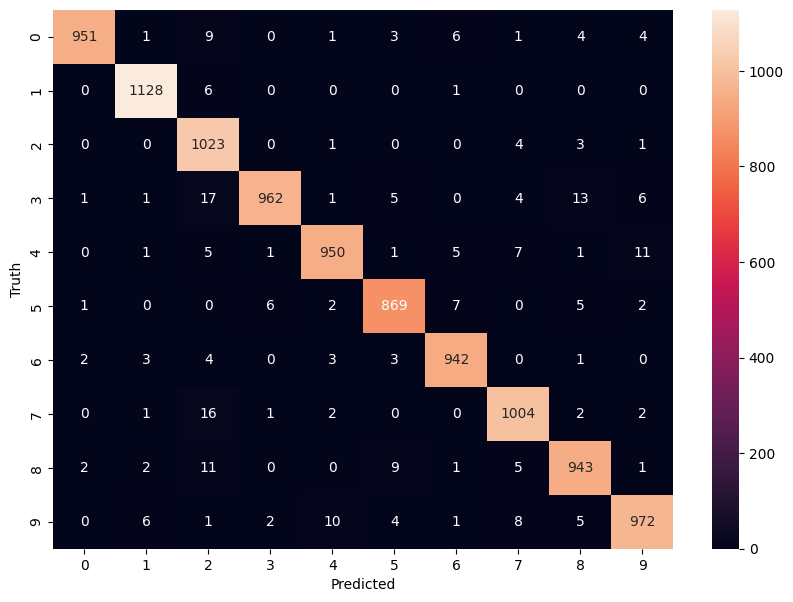

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# 6. Predict
1. Take one row of new set of values/image[not from exisitng] and Predict
2. Show as new feature prediction.

In [23]:
def load_image(filename):
    # load the image
    img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28*28)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

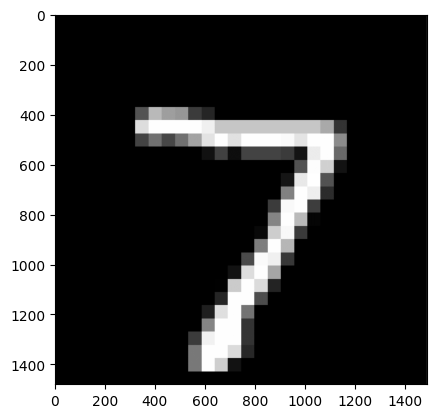

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
predict_value/digit: 7


In [24]:
import matplotlib.image as mpimg
img = mpimg.imread("../input/imghbbuu/sample_image.png")
imgplot = plt.imshow(img)
plt.show()

img = load_image('../input/imghbbuu/sample_image.png')
predict_value = model_2.predict(img)
digit = np.argmax(predict_value)
print("predict_value/digit:",digit) 

# 7. Summary
1. Very simple neural network with no hidden layers  - accuray=92% (test and train) , Trainable params: 7,850.

2. Very simple neural network with hidden layer(100-50-30-10) - accuray=97%(test=99% and train=97%),Trainable params: 85,390

# 8. Test & Submit

In [25]:
import pandas as pd
new_test=pd.read_csv("../input/digit-recognizer/test.csv")
print(new_test.shape)
new_test = new_test / 255
y_predicted = model_2.predict(new_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

result=pd.DataFrame()
result["ImageId"]=[i for i in range(1,28001)]
result["Label"]=y_predicted_labels
result.to_csv('./submission.csv',index=False)

(28000, 784)
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


# 9. Not Covered in this notebook
1. Dropout layers , Batch Normalization(BN) - Regularization
2. Batch size - in model.fit
3. Hyper - Parameter tuning - Number of layers , activation functions(Relu,sigmoid,tanh), 
Optimizers(SGD, Adam)